# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [302]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = r"data/train.p"
validation_file= r"data/valid.p"
testing_file = r"data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [303]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validate examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))


print("Number of training examples =", n_train)
print("Number of validate examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validate examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [304]:
import pandas as pd
signnames= pd.read_csv('signnames.csv')
signnames


ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                               Stop
15       15                                        No vehicles
16       16           Vehicles over 3.5 metric tons prohibited
17       17                                           No entry
18       18                                    General caution
19       19                        Dangerous curve to the left
20       20                       Dangerous curve to the right
21       21                                       Double curve
22       22                                         Bumpy road
23       23                                      Slippery road
24       24                          Road narrows on the right
25       25                                          Road work
26       26                                    Traffic signals
27       27                                        Pedestrians
28       28                                  Children crossing
29       29                                  Bicycles crossing
30       30                                 Beware of ice/snow
31       31                              Wild animals crossing
32       32                End of all speed and passing limits
33       33                                   Turn right ahead
34       34                                    Turn left ahead
35       35                                         Ahead only
36       36                               Go straight or right
37       37                                Go straight or left
38       38                                         Keep right
39       39                                          Keep left
40       40                               Roundabout mandatory
41       41                                  End of no passing
42       42  End of no passing by vehicles over 3.5 metric ...

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [305]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [335]:
import numpy as np
import random
def randon_visualize_imageset(dataset, title="image set", n_plot_x=20,n_plot_y=20):

    image_shape = dataset[0].shape
    
    image_x = image_shape[0]
    image_y = image_shape[1]
    image_depth = image_shape[2]

    new_image = np.zeros((image_x*n_plot_x,image_y*n_plot_y,image_depth),dtype=np.uint8)

    for i in range(n_plot_x):
        for j in range(n_plot_y):
            x_s = i*image_x
            x_e = (i+1)*image_x
            y_s = j*image_y
            y_e = (j+1)*image_y

            index = random.randint(0, len(dataset)-1)
            image = dataset[index]
            new_image[x_s:x_e,y_s:y_e] = image

    plt.figure(figsize=(n_plot_y,n_plot_x))
    new_image = new_image.squeeze()
    plt.imshow(new_image,cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
def visualize_imdata(dataset, title="image dataset",plotrange=None, n_plot_x=20,n_plot_y=20):

    image_shape = dataset[0].shape
    
    image_x = image_shape[0]
    image_y = image_shape[1]
    image_depth = image_shape[2]

    new_image = np.zeros((image_x*n_plot_x,image_y*n_plot_y,image_depth),dtype=np.uint8)

    for i in range(n_plot_x):
        for j in range(n_plot_y):
            x_s = i*image_x
            x_e = (i+1)*image_x
            y_s = j*image_y
            y_e = (j+1)*image_y
            
            
            image = dataset[plotrange]
            plotrange = plotrange + 1

            new_image[x_s:x_e,y_s:y_e] = image

    plt.figure(figsize=(n_plot_y,n_plot_x))
    new_image = new_image.squeeze()
    plt.imshow(new_image,cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

def random_visualize_class(X_data,y_data,title="random visualize class",n_plot_y=10):
    n_classes = len(set(y_data))
    
    image_shape = X_data[0].shape
    
    image_x,image_y,image_depth = image_shape

    
    n_plot_x = int(n_classes / n_plot_y)  + 1
    
    
    new_image = np.zeros((image_x*n_plot_x,image_y*n_plot_y,image_depth),dtype=np.uint8)


    for i in range(n_plot_x):
        for j in range(n_plot_y):
            
            classid = i*n_plot_y + j
            
            if classid >= n_classes:
                break
            
            x_s = i*image_x
            x_e = (i+1)*image_x
            y_s = j*image_y
            y_e = (j+1)*image_y
            
            
            x_data_class_i = X_data[y_data==classid]
            
            
            index = random.randint(0, x_data_class_i.shape[0]-1)
            image = x_data_class_i[index]

            new_image[x_s:x_e,y_s:y_e] = image


    plt.figure(figsize=(n_plot_y,n_plot_x))
    new_image = new_image.squeeze()
    plt.imshow(new_image,cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    



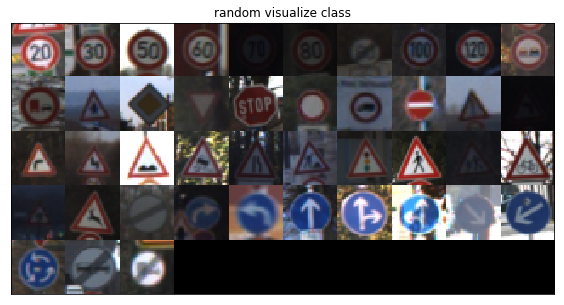

In [336]:
random_visualize_class(X_train,y_train,title="random visualize class",n_plot_y=10)
plt.savefig(r"./img/visualization_0.jpg")



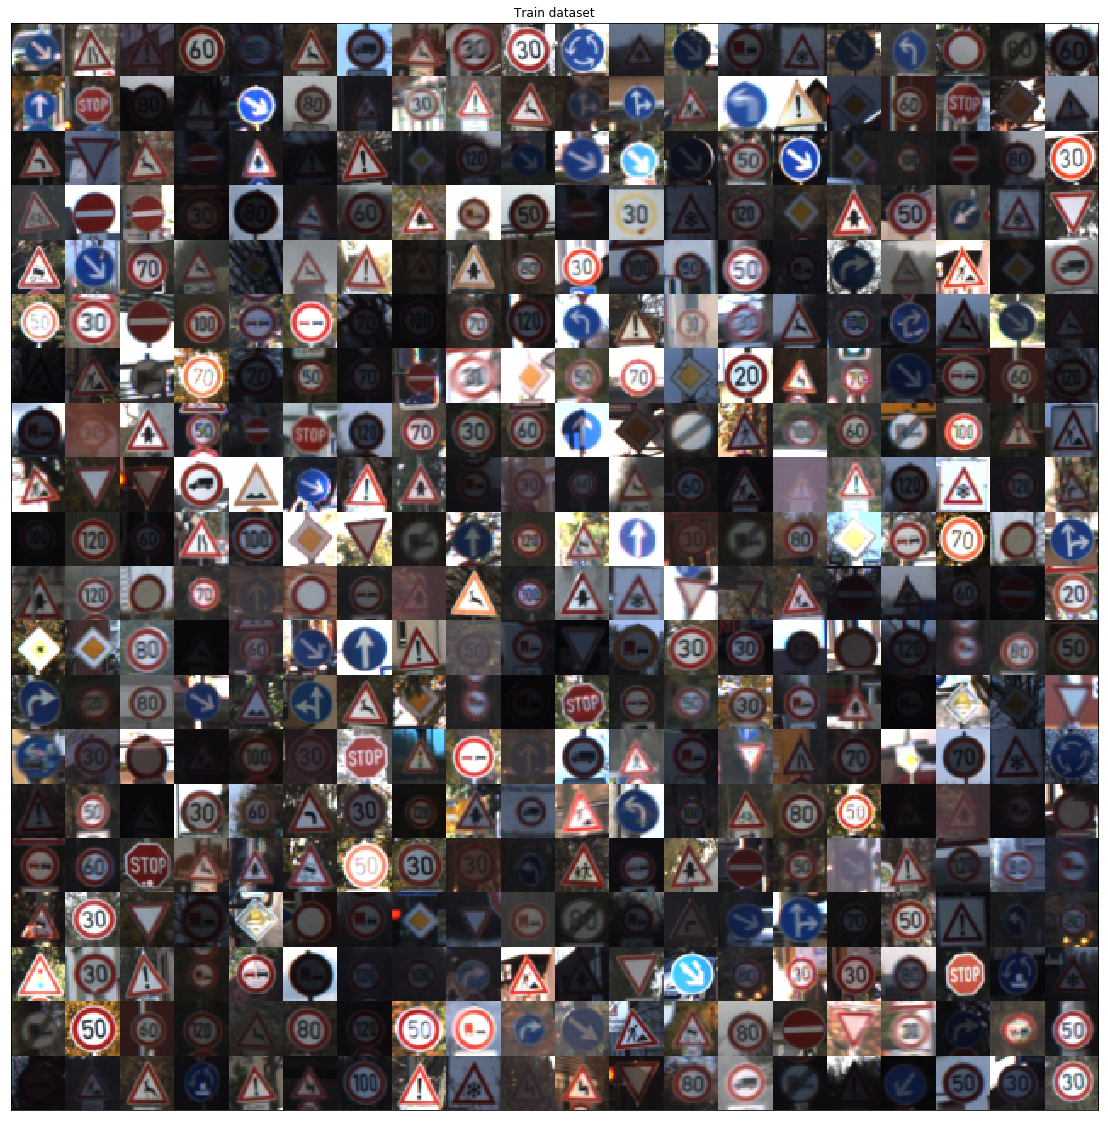

In [337]:
 
randon_visualize_imageset(X_train,title="Train dataset",n_plot_x=20,n_plot_y=20)
plt.savefig(r"./img/visualization_1.jpg")

#randon_visualize_imageset(X_valid,title="Valid dataset",n_plot_x=20,n_plot_y=20)

#randon_visualize_imageset(X_test,title="Test dataset",n_plot_x=20,n_plot_y=20)

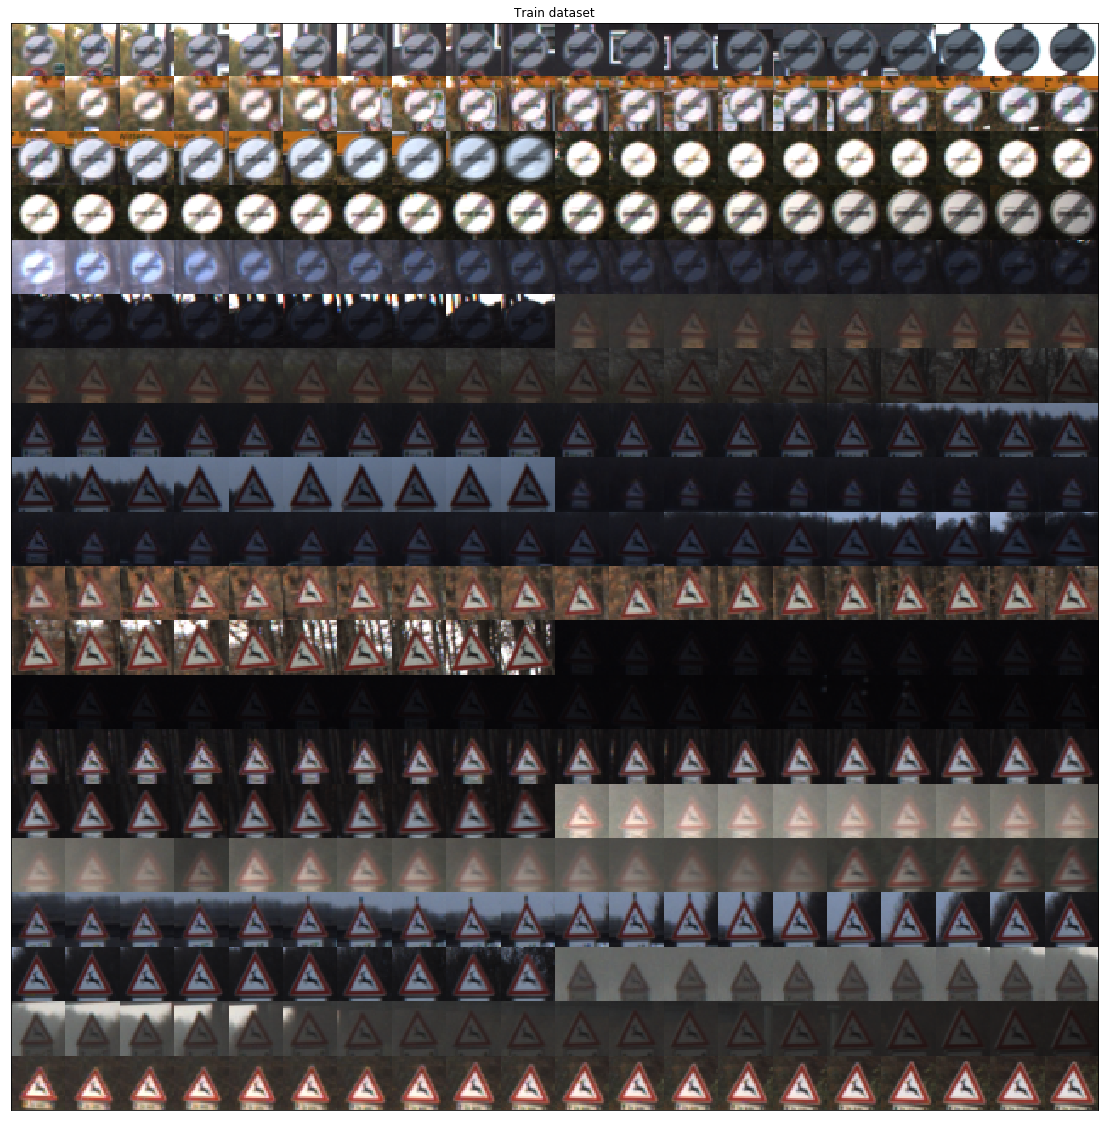

In [338]:
visualize_imdata(X_train,title="Train dataset",plotrange=100,n_plot_x=20,n_plot_y=20)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [339]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


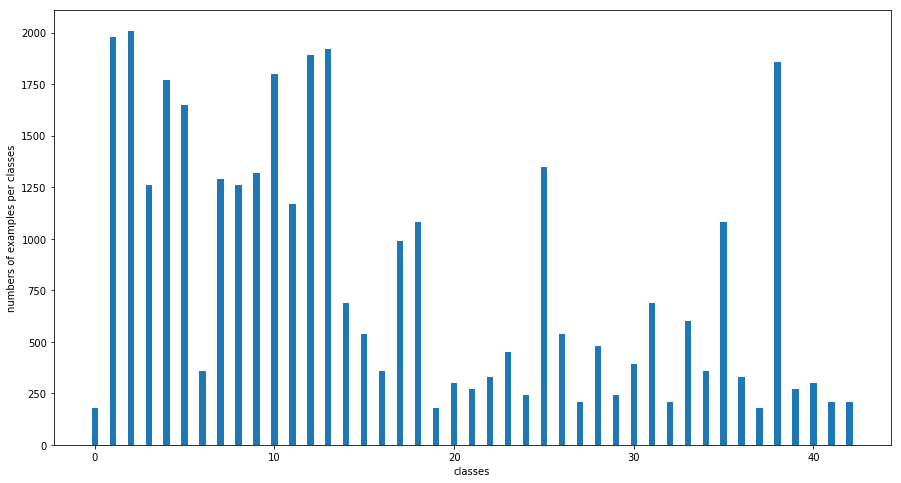

In [340]:
# visualize origin examples distribution
bincount = np.bincount(y_train)
print(bincount)
xlabels = np.arange(len(bincount))
plt.figure(figsize=(15,8))
plt.bar(xlabels,bincount,width=0.35)
plt.xlabel("classes")
plt.ylabel("numbers of examples per classes")
plt.savefig(r"./img/visualization.jpg")


In [341]:
# balance between labels
bincount = np.bincount(y_train)
xlabels = np.arange(len(bincount))

maxcount = np.max(bincount)

X_train_gen = X_train
y_train_gen = y_train

print("max number of examples per labels is {:3d}".format(maxcount))


for i in xlabels:
    xi_index = (y_train == i)
    
    example_pool_x = X_train[xi_index]
    #print(example_pool_x.shape[0])
    
    numbers_of_example = example_pool_x.shape[0]
    
    need_generate = maxcount - numbers_of_example
    
    generate_example = np.random.randint(0,numbers_of_example,size=(need_generate))
    
    gen_X = example_pool_x[generate_example]
    gen_y = np.ones(need_generate,dtype=np.uint8)*i
    #print(gen_X.shape,gen_y.shape)
    #print(X_train_gen.shape)
    
    
    X_train_gen = np.concatenate((X_train_gen,gen_X))
    y_train_gen = np.concatenate((y_train_gen,gen_y))
    
    
print("balance data complated".format(maxcount)) 

max number of examples per labels is 2010
balance data complated


[2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010]


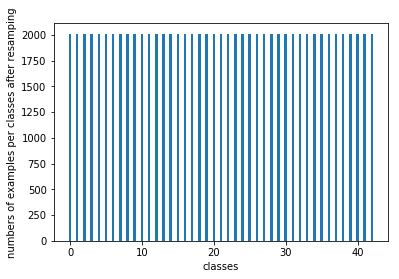

In [342]:
# visualize origin examples distribution
bincount = np.bincount(y_train_gen)
print(bincount)
xlabels = np.arange(len(bincount))
plt.bar(xlabels,bincount,width=0.35)
plt.xlabel("classes")
plt.ylabel("numbers of examples per classes after resamping")
plt.savefig(r"./img/visualization_2.jpg")



In [343]:
# converting to grayscale
import cv2
import numpy as np

def RGB2YUV(dataset):
    s1,s2,s3,s4 = dataset.shape
    new_dataset = np.zeros((s1,s2,s3,3),dtype=dataset.dtype)
    
    for i in range(s1):
        new_dataset[i,:,:,:]=cv2.cvtColor(dataset[i,:,:,:],cv2.COLOR_RGB2YUV)
        
    # pick up only Y channel
    new_dataset = np.reshape(new_dataset[:,:,:,0],(s1,s2,s3,1))
    return new_dataset

def RGB2GRY(dataset):
    s1,s2,s3,s4 = dataset.shape
    new_dataset = np.zeros((s1,s2,s3),dtype=dataset.dtype)
    
    for i in range(s1):
        new_dataset[i,:,:]=cv2.cvtColor(dataset[i,:,:,:],cv2.COLOR_RGB2GRAY)
        
    new_dataset = np.reshape(new_dataset[:,:,:],(s1,s2,s3,1))
    return new_dataset

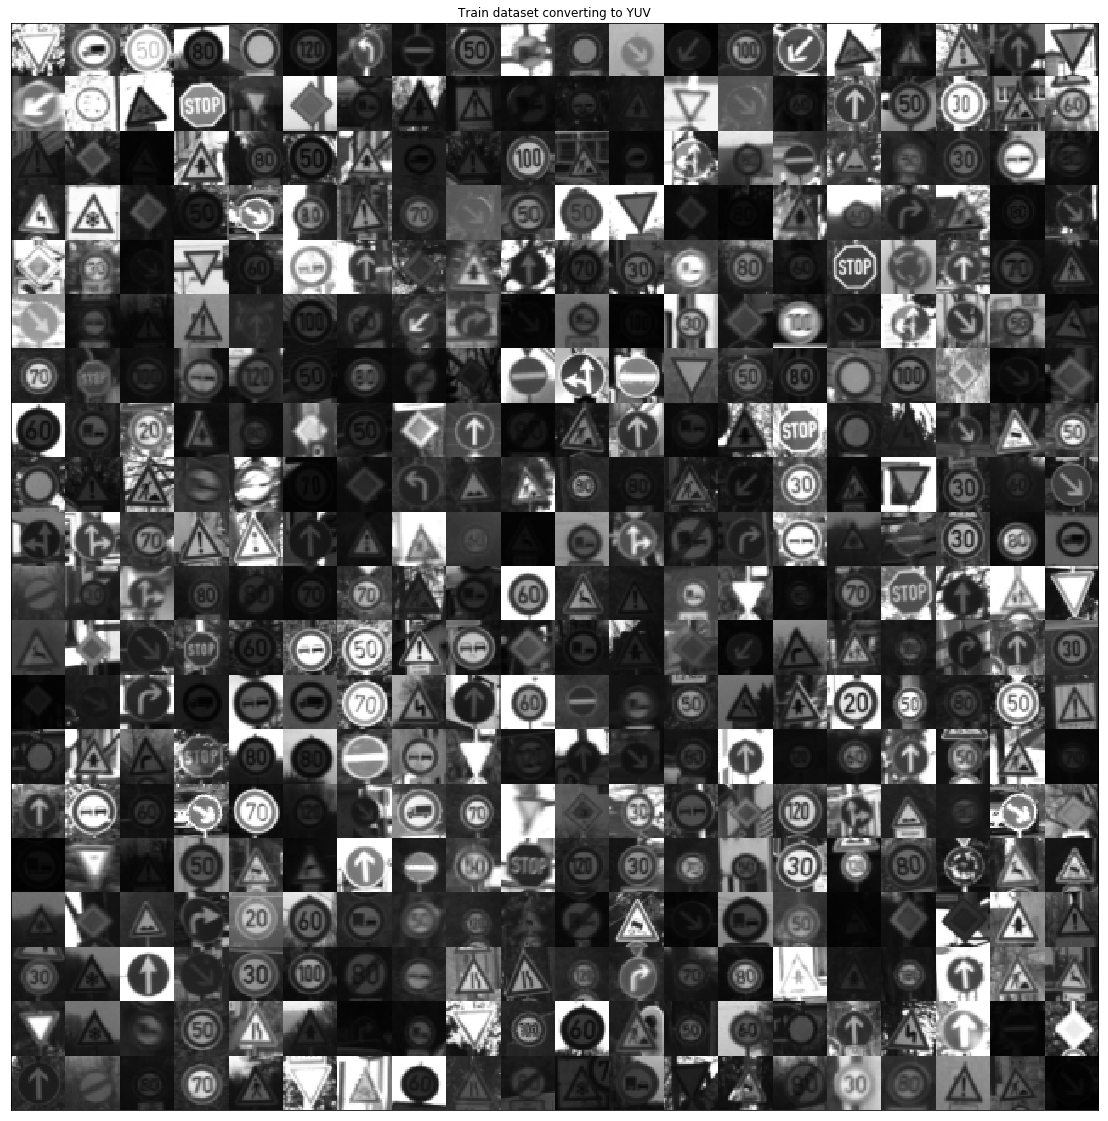

In [344]:
X_train_yuv = RGB2YUV(X_train)
X_valid_yuv = RGB2YUV(X_valid)
X_test_yuv = RGB2YUV(X_test)


randon_visualize_imageset(X_train_yuv,title="Train dataset converting to YUV",n_plot_x=20,n_plot_y=20)
plt.savefig(r"./img/visualization_3.jpg")



#randon_visualize_imageset(X_valid_yuv,title="Valid dataset converting to YUV",n_plot_x=20,n_plot_y=20)

#randon_visualize_imageset(X_test_yuv,title="Test dataset converting to YUV",n_plot_x=20,n_plot_y=20)

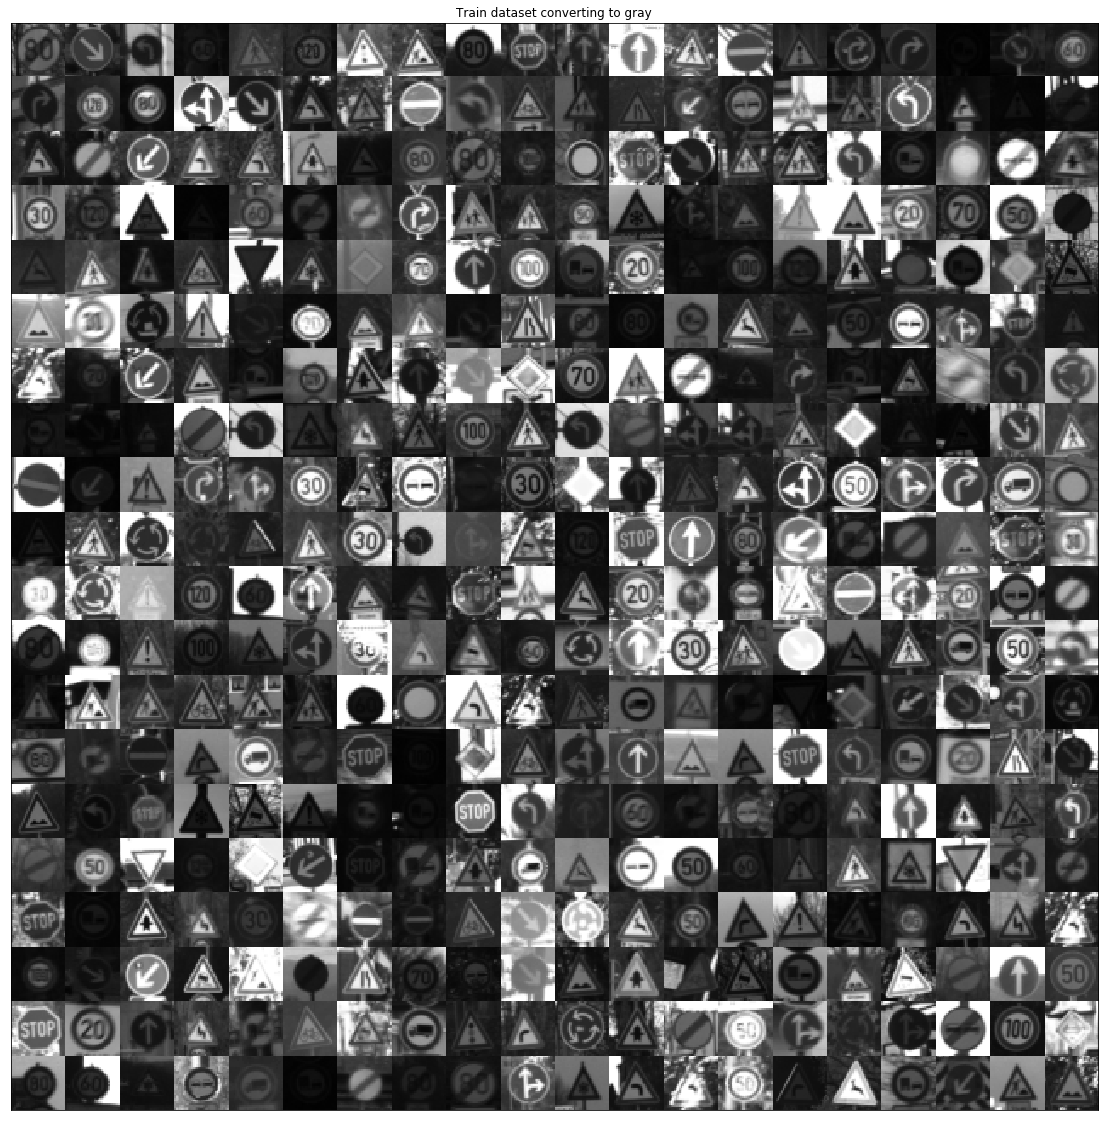

In [345]:
# converting to grayscale

X_train_gray = RGB2GRY(X_train_gen)
X_valid_gray = RGB2GRY(X_valid)
X_test_gray = RGB2GRY(X_test)

randon_visualize_imageset(X_train_gray,title="Train dataset converting to gray",n_plot_x=20,n_plot_y=20)
plt.savefig(r"./img/visualization_4.jpg")


#randon_visualize_imageset(X_valid_gray,title="Valid dataset converting to gray",n_plot_x=20,n_plot_y=20)

#randon_visualize_imageset(X_test_gray,title="Test dataset converting to gray",n_plot_x=20,n_plot_y=20)

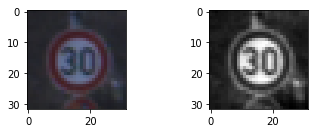

In [346]:
# gray scaling 

examples_id = 4000

plt.subplot(221)
img_origin = X_train[examples_id,:,:,:].squeeze()
plt.imshow(img_origin, cmap="gray")

plt.subplot(222)
img_gray = X_train_gray[examples_id,:,:,:].squeeze()
plt.imshow(img_gray, cmap="gray")

plt.savefig(r"./img/grayscale.jpg")


In [347]:
# normilize

def image_normize(dataset):
    
    s1,s2,s3,s4 = dataset.shape
    new_dataset = np.zeros((s1,s2,s3,s4),dtype=np.float32)
    
    for i in range(s1):
        origin_image = dataset[i,:,:,:]
        
        #new_dataset[i,:,:] = (origin_image -128)/128
        new_dataset[i,:,:] = (origin_image /256.0) - 0.5

        #max_i = np.max(origin_image)
        #min_i = np.min(origin_image)
        #print(min_i,max_i)
        #new_dataset[i,:,:] = 255*(origin_image - min_i)/max_i
        
    new_dataset = np.reshape(new_dataset[:,:,:],(s1,s2,s3,1))
    return new_dataset


X_train_gray_norm = image_normize(X_train_gray)
X_valid_gray_norm = image_normize(X_valid_gray)
X_test_gray_norm = image_normize(X_test_gray)

#print(X_train_gray_norm[0])

#randon_visualize_imageset(X_train_gray_norm,title="norm",n_plot_x=20,n_plot_y=20)
#randon_visualize_imageset(X_valid_gray_norm,title="norm",n_plot_x=20,n_plot_y=20)

### Model Architecture

In [348]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [349]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [350]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x,keep_prob, fcp=(120,120,84)):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    with tf.name_scope("CONV1"):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU1"):
        conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    with tf.name_scope("POOL1"):
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    with tf.name_scope("CONV2"):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU2"):
        conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    with tf.name_scope("POOL2"):
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    with tf.name_scope("Flatten"):
        fc0 = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.name_scope("FC1"):
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, fcp[0]), mean=mu, stddev=sigma))
        fc1_b = tf.Variable(tf.zeros(fcp[0]))
        fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU3"):
        fc1 = tf.nn.relu(fc1)


    with tf.name_scope("DROP_OUT_1"):
        fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    with tf.name_scope("FC2"):
        fc2_W = tf.Variable(tf.truncated_normal(shape=(fcp[0], fcp[1]), mean=mu, stddev=sigma))
        fc2_b = tf.Variable(tf.zeros(fcp[1]))
        fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU4"):
        fc2 = tf.nn.relu(fc2)
        
    with tf.name_scope("DROP_OUT_2"):
        fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)
    
    if len(fcp)==2:
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
        with tf.name_scope("FC3"):
            fc3_W = tf.Variable(tf.truncated_normal(shape=(fcp[1], 43), mean=mu, stddev=sigma))
            fc3_b = tf.Variable(tf.zeros(43))
            logits = tf.matmul(fc2, fc3_W) + fc3_b

        return logits
    elif len(fcp)==3:
        
        with tf.name_scope("FC3"):
            fc4_W = tf.Variable(tf.truncated_normal(shape=(fcp[1], fcp[2]), mean=mu, stddev=sigma))
            fc4_b = tf.Variable(tf.zeros(fcp[2]))
            fc4 = tf.matmul(fc2, fc4_W) + fc4_b
            
        with tf.name_scope("RELU5"):
            fc4 = tf.nn.relu(fc4)
        

        with tf.name_scope("FC4"):
            fc5_W = tf.Variable(tf.truncated_normal(shape=(fcp[2], 43), mean=mu, stddev=sigma))
            fc5_b = tf.Variable(tf.zeros(43))
            logits = tf.matmul(fc4, fc5_W) + fc5_b
            
        return logits
        


x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, ())



EPOCHS = 200
BATCH_SIZE = 128
rate = 0.001
training_keep_prob = 0.5

netpara = (300,200)

logits = LeNet(x,keep_prob, netpara)

tf.summary.image("x", x,max_outputs=3)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

tf.summary.scalar('accuracy', accuracy_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

merged = tf.summary.merge_all()


# start training

X_train_data = X_train_gray_norm
y_train_data = y_train_gen
X_valid_data = X_valid_gray
y_valid_data = y_valid


print(X_train_data.shape)

with tf.Session() as sess:

    # sess.graph_def is the graph definition; that enables the Graph Visualizer.
    file_writer = tf.summary.FileWriter('./logs', sess.graph)

    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_data, y_train_data = shuffle(X_train_data, y_train_data)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:training_keep_prob})

            if 0: #offset % (BATCH_SIZE*100) == 0.0:
                summary, Traing_loss = sess.run([merged,loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1})
                print("batch = {:.3f}  Traing Loss = {:.3f}".format(offset, Traing_loss))
                file_writer.add_summary(summary, i*num_examples+offset)


        Training_accuracy = evaluate(X_train_data, y_train_data)
        validation_accuracy = evaluate(X_valid_data, y_valid_data)
        print("EPOCH {} ... Training Accuracy= {:.3f}  Validation Accuracy = {:.3f}".format(i+1, Training_accuracy,validation_accuracy))

        #file_writer.add_summary(summary,i)

    saver.save(sess, './lenet')
    print("Model saved")

(86430, 32, 32, 1)
Training...

EPOCH 1 ... Training Accuracy= 0.951  Validation Accuracy = 0.814
EPOCH 2 ... Training Accuracy= 0.981  Validation Accuracy = 0.879
EPOCH 3 ... Training Accuracy= 0.991  Validation Accuracy = 0.911
EPOCH 4 ... Training Accuracy= 0.993  Validation Accuracy = 0.917
EPOCH 5 ... Training Accuracy= 0.996  Validation Accuracy = 0.932
EPOCH 6 ... Training Accuracy= 0.997  Validation Accuracy = 0.932
EPOCH 7 ... Training Accuracy= 0.997  Validation Accuracy = 0.928
EPOCH 8 ... Training Accuracy= 0.998  Validation Accuracy = 0.938
EPOCH 9 ... Training Accuracy= 0.999  Validation Accuracy = 0.944
EPOCH 10 ... Training Accuracy= 0.998  Validation Accuracy = 0.922
EPOCH 11 ... Training Accuracy= 0.999  Validation Accuracy = 0.945
EPOCH 12 ... Training Accuracy= 0.999  Validation Accuracy = 0.930
EPOCH 13 ... Training Accuracy= 0.999  Validation Accuracy = 0.942
EPOCH 14 ... Training Accuracy= 0.999  Validation Accuracy = 0.942
EPOCH 15 ... Training Accuracy= 1.000  

In [351]:
# calc test accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_gray_norm, y_test)
    print("Test Accuracy= {:.3f}".format(test_accuracy))
    

Test Accuracy= 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

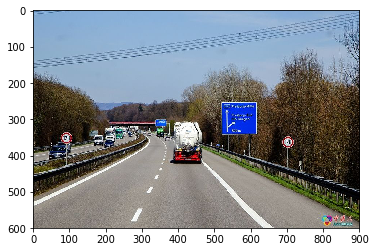

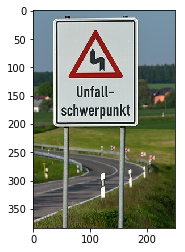

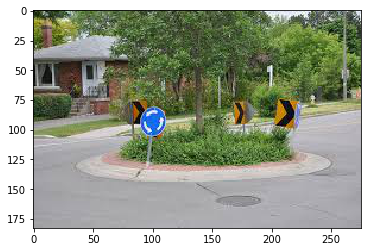

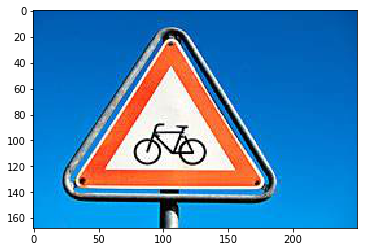

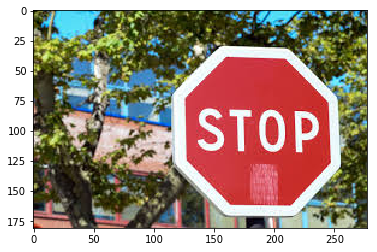

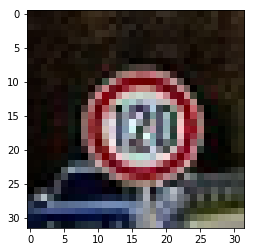

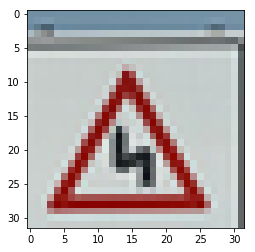

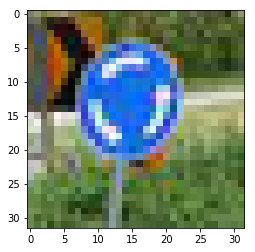

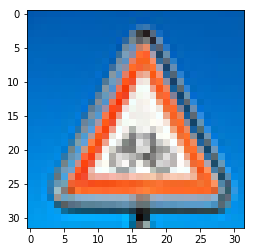

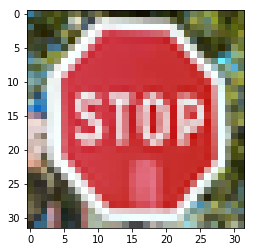

In [323]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.pyplot as plt
from PIL import Image

imgfiles = [r'./data/p1.jpg',
            r'./data/p2.jpg',
            r'./data/p3.jpg',
            r'./data/p4.jpg',
            r'./data/p5.jpg']

interesting_zone = [(60,320,120,380),
                   (50,0,180,130),
                   (80,75,125,120),
                   (0,0,200,160),
                   (100,25,270,175)]



imgs = [plt.imread(filename) for filename in imgfiles]

for imgfile in imgs:
    plt.figure()
    plt.imshow(imgfile)

X_internet = np.zeros((5,32,32,3),dtype=np.uint8)

i = 0
for imgfile,box in zip(imgfiles,interesting_zone):
    pil_im = Image.open(imgfile)
    
    #box = (100,100,400,400)
    region = pil_im.crop(box)
    
    img_32X32 = region.resize(size=(32,32),resample=Image.ADAPTIVE)
    I = np.asarray(img_32X32)
    
    X_internet[i,:,:,:] = I
    i=i+1
    plt.figure()
    plt.imshow(I)

### Predict the Sign Type for Each Image

In [324]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

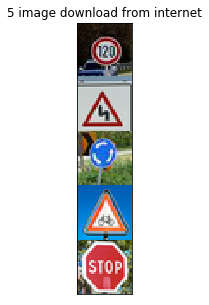

In [325]:
visualize_imdata(X_internet,title="5 image download from internet",plotrange=0,n_plot_x=5,n_plot_y=1)    

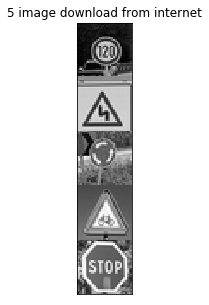

In [326]:
X_internet_gray = RGB2GRY(X_internet)
visualize_imdata(X_internet_gray,title="5 image download from internet",plotrange=0,n_plot_x=5,n_plot_y=1)   

In [327]:
# normize
X_internet_gray_norm = image_normize(X_internet_gray)

In [328]:
# the results predict by human
y_internet = np.array([8,21,40,29,14])

predict result are as follow:
8     Speed limit (120km/h)
31    Wild animals crossing
39                Keep left
29        Bicycles crossing
14                     Stop
Name: SignName, dtype: object


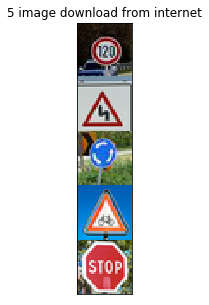

In [352]:
# from tensorflow import top_k

prediction = tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    resultp = sess.run(prediction,feed_dict={x:X_internet_gray_norm,keep_prob:1})
    print("predict result are as follow:")
    print(signnames.SignName[resultp])

visualize_imdata(X_internet,title="5 image download from internet",plotrange=0,n_plot_x=5,n_plot_y=1)    


### Analyze Performance

In [353]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


prediction = tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    web_Accuracy = evaluate(X_internet_gray_norm,y_internet)

    print("Accuracy for 5 new images = {:.3f}".format(web_Accuracy))




Accuracy for 5 new images = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

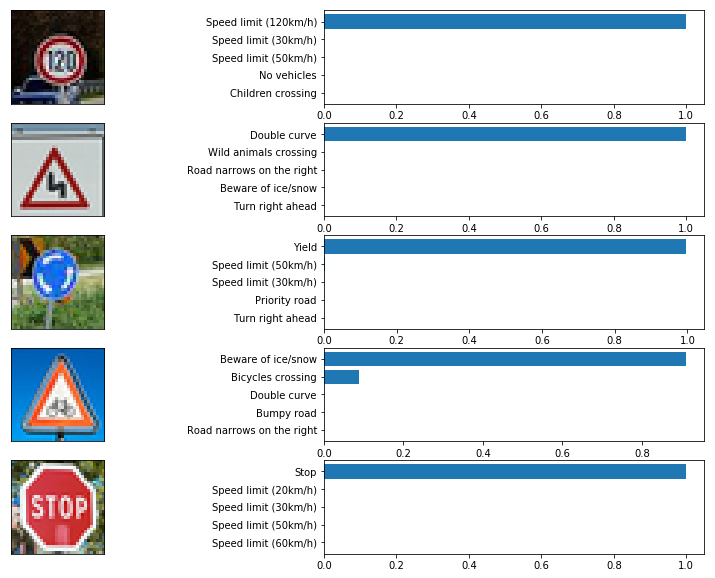

In [331]:
# from tensorflow import top_k

softmax = tf.nn.softmax(logits)
top5 = tf.nn.top_k(softmax,k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5p = sess.run(top5,feed_dict={x:X_internet_gray_norm,keep_prob:1})
    

sign_map = signnames.SignName.to_dict()
f, axarr = plt.subplots(5, 2, figsize=(15,10))


for i in range(5):
    
    axarr[i,0].imshow(X_internet[i,:,:,:])
    axarr[i,0].set_xticks([])
    axarr[i,0].set_yticks([])

    top5p_i = top5p.values[i]
    y_pos = np.arange(5)
    y_label = tuple([sign_map[int(k)] for k in top5p.indices[i]])
    
    axarr[i,1].yaxis.set_label_position("right")
    axarr[i,1].barh(y_pos,top5p_i,align="center")
    
    axarr[i,1].invert_yaxis()  # labels read top-to-bottom

    axarr[i,1].set_yticks(y_pos)
    axarr[i,1].set_yticklabels(y_label)

plt.savefig(r"./img/top5.jpg")


In [332]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [333]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 